<a href="https://colab.research.google.com/github/HagiwaraNorito/DeepLearning2022Late/blob/main/DogVsCat2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#

##ライブラリの読み込み

In [15]:
%matplotlib inline
from keras.applications.vgg16 import VGG16,preprocess_input, decode_predictions
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import sys

In [16]:
model=VGG16(weights='imagenet')

##画像判別のための関数

In [26]:
from keras.layers.recurrent import RECURRENT_DROPOUT_WARNING_MSG
def predict(filename,featuresize):
  img=image.load_img(filename,target_size=(224,224))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  preds=model.predict(preprocess_input(x))
  results=decode_predictions(preds,top=featuresize)[0]
  return results


##画像表示のための関数

In [27]:
def showimg(filename,title,i):
  im=Image.open(filename)
  im_list=np.array(im)
  plt.subplot(2,5,i)
  plt.title(title)
  plt.axis('off')
  plt.imshow(im_list)


##kaggeにある画像データを利用する
https://www.kaggle.com/

犬猫判別の画像データ

https://www.kaggle.com/c/dogs-vs-cats/data

## 指定されたURLからファイルをダウンロードする

In [28]:
#wgetでwebからファイルをダウンロードする
#googleCokabでコマンドを実行するときは、先頭に！マークを必ず
!wget
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O train.zip && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O test.zip && rm -rf /tmp/cookies.txt


wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.
--2022-10-04 00:58:39--  https://drive.google.com/uc?export=download&confirm=t&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2
Resolving drive.google.com (drive.google.com)... 142.251.31.100, 142.251.31.139, 142.251.31.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.31.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qq011n5pvrvdmfa7sorqd9fn94jheja9/1664845050000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=9b7950d5-b4f0-400e-b890-e5b6f3d41458 [following]
--2022-10-04 00:58:39--  https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qq011n5pvrvdmfa7sorqd9fn94jheja9/1664845050000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=9b7950d5-b4f0-400e-b890-e5b6f3d41458
Resolving do

Colbに自分のGoogleアカウントのドライブをマウントする

In [29]:
from google.colab import drive
#googleドライブをマウント
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import os
dir_path="/content/drive/My Drive/2022LATE"
os.makedirs(dir_path,exist_ok=True)
!pwd
!cp train.zip "/content/drive/My Drive/2022LATE"

/content


##GoogleドライブからCplabへファイルをコピー

In [31]:
!cp "/content/drive/My Drive/2022LATE/train.zip"

cp: missing destination file operand after '/content/drive/My Drive/2022LATE/train.zip'
Try 'cp --help' for more information.


In [32]:
##zipファイルを解凍する

In [33]:
!unzip -o -q "train.zip"
print("zip解凍完了")

zip解凍完了


##解凍した画像を使って画像判別させる

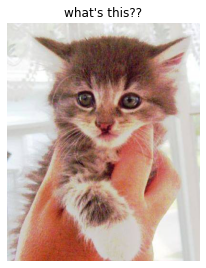

49152/35363 [=========================================] - 0s 0us/step
('n03958227', 'plastic_bag', 0.24324372)
('n02123045', 'tabby', 0.22490403)
('n02124075', 'Egyptian_cat', 0.07931747)
('n02123159', 'tiger_cat', 0.065413244)
('n02123394', 'Persian_cat', 0.0394602)
('n02808304', 'bath_towel', 0.03401416)
('n04209239', 'shower_curtain', 0.019263193)
('n03887697', 'paper_towel', 0.01877996)
('n04070727', 'refrigerator', 0.016609214)
('n04553703', 'washbasin', 0.016154714)


In [34]:
filename = "train/cat.100.jpg"
plt.figure(figsize=(20,10))
for i in range(1):
  showimg(filename,"what's this??",i+1)
plt.show()

results=predict(filename,10)

for result in results:

  print(result)